## Exploratory Analysis for Jewelry_Type = 'Rings'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
import json
import re
import seaborn as sns

import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score


#Create label for price
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#used for expanding the no o viible columns of dataframe



#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
filename = '/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/raw/effy_clean_split_data.csv'
df = pd.read_csv(filename )

In [4]:
df['Jewelry_Type'].value_counts()

Rings                   1104
Necklace and Pendant     690
Earrings                 413
Bracelets                234
Name: Jewelry_Type, dtype: int64

In [5]:
df[df['Jewelry_Type']=='Rings'].describe()

,Discount_Price,Price,Product_Carat,Stone1_Carat,Stone2_Carat,Stone3_Carat,Stone4_Carat,Stone5_Carat,Stone6_Carat
count,1104.000000,1104.000000,1104.000000,1104.000000,580.000000,28.000000,3.000000,2.0,1.0
mean,2912.287591,4591.213768,1.966014,1.803931,0.395328,0.413571,0.023333,0.0,0.0
std,3415.502234,5131.953538,2.245148,2.233570,0.512195,1.103809,0.040415,0.0,NaN
min,157.500000,225.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1396.500000,2195.000000,0.650000,0.550000,0.130000,0.000000,0.000000,0.0,0.0
50%,2215.000000,3495.000000,1.360000,1.140000,0.270000,0.045000,0.000000,0.0,0.0
75%,3297.500000,5500.000000,2.372500,2.100000,0.470000,0.160000,0.035000,0.0,0.0
max,56350.000000,80500.000000,23.360000,21.160000,4.990000,5.000000,0.070000,0.0,0.0


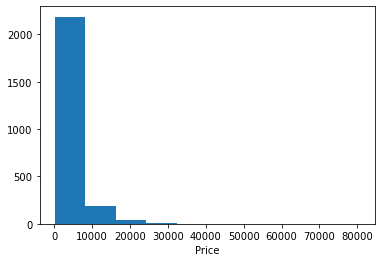

In [6]:
# Making a histogram of the price variable.
_ = plt.hist(df['Price'])
_ = plt.xlabel('Price')
plt.show()

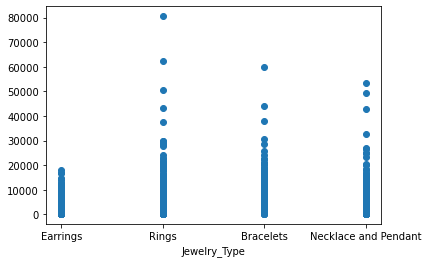

In [7]:
# Making a histogram of the price variable.
_ = plt.scatter(df['Jewelry_Type'], df['Price'])
_ = plt.xlabel('Jewelry_Type')
plt.show()

In [8]:
df_rings = df[df['Jewelry_Type']=='Rings']

In [9]:
df_rings = df_rings.drop(columns=['Stone3_Desc', 'Stone3_Carat', 'Stone3_Stone', 'Stone3_Color','Stone3_Cut',                               
                                  'Stone4_Desc', 'Stone4_Carat', 'Stone4_Stone', 'Stone4_Color','Stone4_Cut',
                                  'Stone5_Desc','Stone5_Carat', 'Stone5_Stone', 'Stone5_Color', 'Stone5_Cut',
                                  'Stone6_Desc', 'Stone6_Carat', 'Stone6_Stone', 'Stone6_Color','Stone6_Cut'])

In [10]:
df_rings.columns

Index(['Description', 'Discount_Price', 'Price', 'Metal', 'Metal Color',
       'Stones', 'Jewelry_Type', 'Product_Carat', 'Stone1_Desc',
       'Stone1_Carat', 'Stone1_Stone', 'Stone1_Color', 'Stone1_Cut',
       'Stone2_Desc', 'Stone2_Carat', 'Stone2_Stone', 'Stone2_Color',
       'Stone2_Cut'],
      dtype='object')

In [11]:
df_rings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 413 to 1516
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Description     1104 non-null   object 
 1   Discount_Price  1104 non-null   float64
 2   Price           1104 non-null   float64
 3   Metal           1104 non-null   object 
 4   Metal Color     1104 non-null   object 
 5   Stones          1104 non-null   object 
 6   Jewelry_Type    1104 non-null   object 
 7   Product_Carat   1104 non-null   float64
 8   Stone1_Desc     1104 non-null   object 
 9   Stone1_Carat    1104 non-null   float64
 10  Stone1_Stone    1104 non-null   object 
 11  Stone1_Color    1104 non-null   object 
 12  Stone1_Cut      1104 non-null   object 
 13  Stone2_Desc     580 non-null    object 
 14  Stone2_Carat    580 non-null    float64
 15  Stone2_Stone    580 non-null    object 
 16  Stone2_Color    580 non-null    object 
 17  Stone2_Cut      580 non-null   

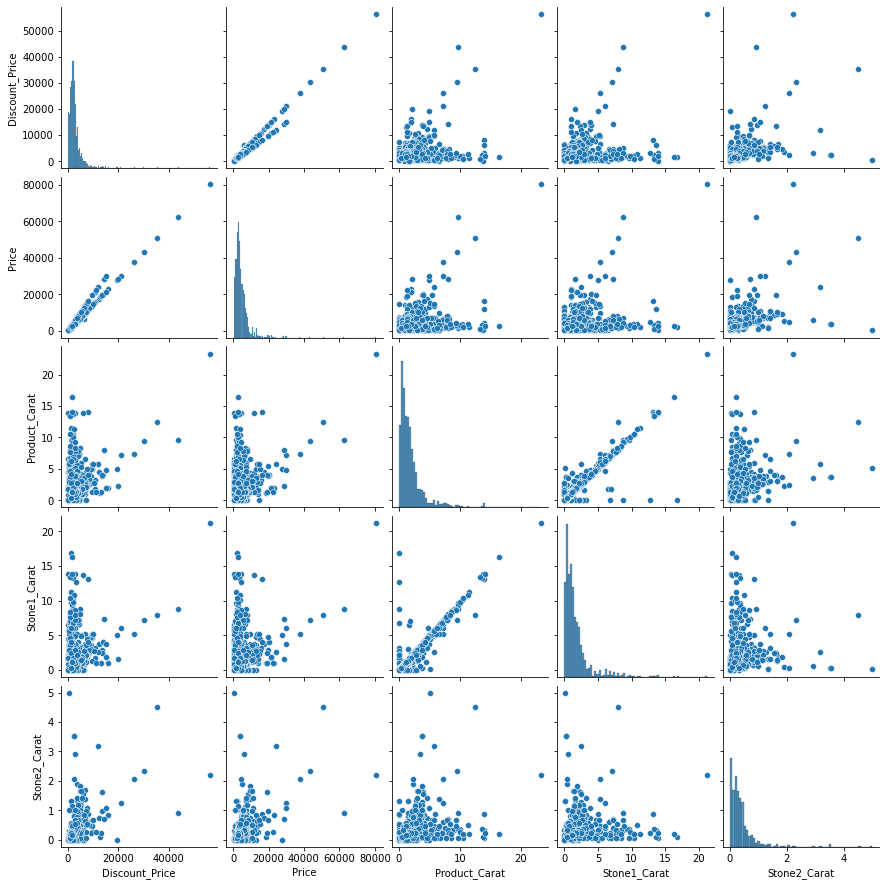

In [12]:
sns.pairplot(df_rings)
plt.show()

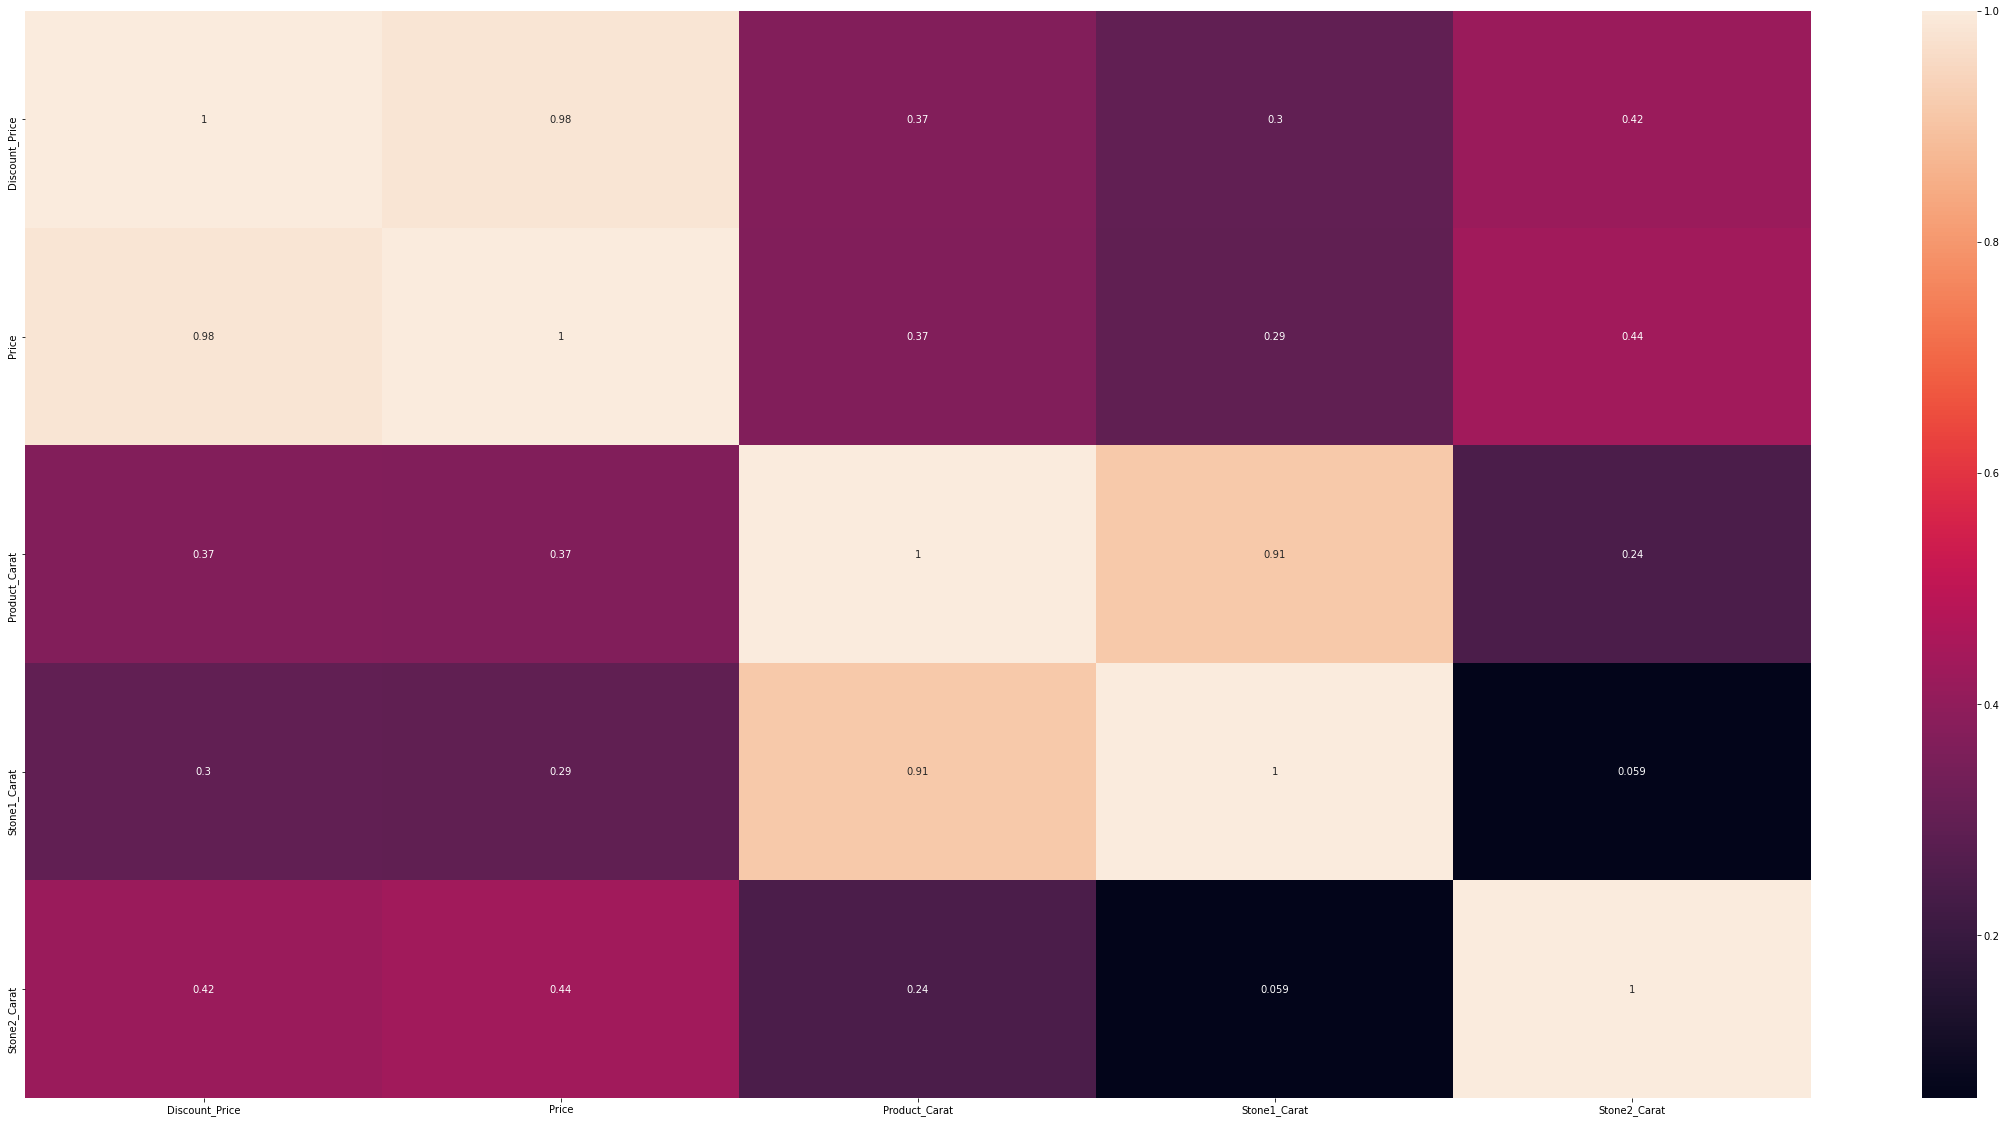

In [13]:
plt.figure(figsize=(40,20))
sns.heatmap(df_rings.corr(), annot=True)
plt.show()

In [14]:
df_rings['Metal'].unique()

array(['14K Gold', '18K Gold', 'Sterling Silver',
       'Sterling Silver & 18K Gold', 'Sterling Silver & 14K Gold',
       'Stainless Steel & 18K Gold', '14k Gold'], dtype=object)

In [15]:
df_rings['Metal'] = df_rings['Metal'].str.replace('14k Gold','14K Gold')

In [16]:
idx = df_rings[df_rings['Metal'] =='Stainless Steel & 18K Gold'].index
df_rings.drop(idx,inplace=True)

In [17]:
#df_rings[df_rings['Metal Color'] == '']
df_rings.loc[(df_rings['Stone1_Stone'] == 'Alexandrite') & 
             (df_rings['Stone1_Color'].str.isspace()),
            'Stone1_Color'] = 'Bluish-Green'

In [18]:
df_rings['Stone1_Stone'] = df_rings['Stone1_Stone'].str.replace('Lazuli','Lapis-Lazuli')

In [19]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Amethyst') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Amethyst')]

In [20]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Aquamarine') & 
             (df_rings['Stone1_Color'].str.isspace()), 
             'Stone1_Color'] = 'Greenish-Blue'
#df_rings.loc[(df_rings['Stone1_Stone'] == 'Aquamarine')]

In [21]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Citrine') & 
             (df_rings['Stone1_Color'].str.isspace()), 
             'Stone1_Color'] = 'Yellow'
#df_rings.loc[(df_rings['Stone1_Stone'] == 'Citrine')]

In [22]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Diamond') & 
             (df_rings['Stone1_Color'].str.isspace()), 
             'Stone1_Color'] = 'White'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Diamond')]

In [23]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Emerald') & 
             (df_rings['Stone1_Color'].str.isspace()), 
             'Stone1_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Emerald')]

In [24]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Garnet') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Red'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Garnet')]

In [25]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Jade') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Jade')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Lapis-Lazuli') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Lapis-Lazuli')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Malachite') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Malachite')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Morganite') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Pink'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Morganite')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Color') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Multi-Color'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Color')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Sapphire') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Multi-Sapphire'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Sapphire')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Onyx') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Black'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Onyx')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Opal') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'White'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Opal')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Pearl') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'White'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Pearl')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Quartz') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Smokey'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Quartz')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Ruby') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Red'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Ruby')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Sapphire') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Sapphire')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Tanzanite') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Tanzanite')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Topaz') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Topaz')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Turquoise') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Turquoise'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Turquoise')]


In [26]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Quartz') &
            (df_rings['Stone1_Cut'] == 'Smokey')]

,Description,Discount_Price,Price,Metal,Metal Color,Stones,Jewelry_Type,Product_Carat,Stone1_Desc,Stone1_Carat,Stone1_Stone,Stone1_Color,Stone1_Cut,Stone2_Desc,Stone2_Carat,Stone2_Stone,Stone2_Color,Stone2_Cut
1285,"Effy Mosaic Sterling Silver Multi Gemstone Ring, 1.66 TCW",157.5,225.0,Sterling Silver,Sterling Silver,"Smokey Quartz, Peridot, Garnet, Citrine, Amethyst, Blue Topaz and Garnet",Rings,1.66,Smokey Quartz,0.0,Quartz,Smokey,Smokey,Peridot,0.0,Peridot,,


In [27]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Quartz') &
            (df_rings['Stone1_Cut'] == 'Smokey'), 'Stone1_Cut'] = 'Oval'

In [28]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Diamond') &
            (df_rings['Stone1_Cut'].str.isspace()), 'Stone1_Cut'] = 'Round'

In [29]:
df_rings.drop(df_rings[df_rings['Stone1_Stone']== ' '].index,inplace=True)
df_rings.drop(df_rings[df_rings['Stone2_Stone'] == 'Band'].index, inplace=True)
df_rings.drop(df_rings[df_rings['Stone2_Stone'] == 'Bands'].index, inplace=True)

df_rings.drop(df_rings[df_rings['Stone2_Desc'] == 'Matching band for Style WZ0M486DTR'].index, inplace=True)
df_rings.drop(df_rings[df_rings['Stone2_Desc'] == 'Matching band for Style WZ0P637D26'].index, inplace=True)



In [30]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Diamond') & 
             (df_rings['Stone2_Color'].str.isspace()), 
             'Stone2_Color'] = 'White'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Diamond')]

In [31]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Emerald') & 
             (df_rings['Stone2_Color'].str.isspace()), 
             'Stone2_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Emerald')]

In [32]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Garnet') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Red'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Garnet')]

In [33]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Multi-Sapphire') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Multi-Sapphire'
#df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Sapphire')]

In [34]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Ruby') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Red'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Ruby')]

df_rings.loc[(df_rings['Stone2_Stone'] == 'Sapphire') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Sapphire')]


In [35]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Peridot') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Green'

df_rings.loc[(df_rings['Stone2_Stone'] == 'Peridot') & 
             (df_rings['Stone2_Cut'].str.isspace()),
             'Stone2_Cut'] = 'Oval'

In [36]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Tsavorite') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Green'

In [37]:
df_rings[['Stones','Product_Carat']].loc[(df_rings['Stone1_Carat'] == 0) & 
             (df_rings['Stone2_Carat'] == 0)]

,Stones,Product_Carat
425,"Round Diamond, Round Black Diamond , Round Cognac Diamond",1.47
619,"Round Cognac Diamond, Round Diamond ,",0.46
623,"Round Diamond, Round Black Diamond , Round Cognac Diamond ,",0.72
626,"Round Diamond, Round Black Diamond , Round Emerald 0.05,",1.40
631,"Round Diamond, Round Cognac Diamond , Round Emerald 0.19",2.89
635,"Round Cognac Diamond, Round Diamond ,",0.89
636,"Round Diamond, Round Cognac Diamond , Round Emerald 0.02,",0.66
637,"Round Diamond, Round Cognac Diamond , Round Emerald 0.06,",1.35
648,"Round Diamond, Round Black Diamond ,",1.28
674,"Round Black Diamond, Round Diamond ,",1.64


In [38]:
#df_rings[['Stones','Product_Carat','Stone1_Carat','Stone2_Carat']].loc[(df_rings['Stone1_Carat'] == 0) & 
 #            (df_rings['Stone2_Carat'] == 0), ['Stone1_Carat','Stone2_Carat'] = df_rings['Product_Carat']/2


for index, row in df_rings.iterrows():
    if (row['Stone1_Carat'] == 0 ) & (row['Stone2_Carat'] == 0):
        c = row['Product_Carat'] / 2 
        #print('Divided c: ', c )
        
        df_rings.at[index, 'Stone1_Carat'] = c
        df_rings.at[index, 'Stone2_Carat'] = c
        #print()
 
                                                                       
                                                                       

In [39]:
#Droping rows with 'Pearl' as Stone1 as Stone1_Carat is 0
#df_rings.drop(df_rings.loc[(df_rings['Stone1_Stone'] == 'Pearl')], axis=0)
df_rings.drop(df_rings[df_rings['Stone1_Stone'] == 'Pearl'].index, inplace=True)

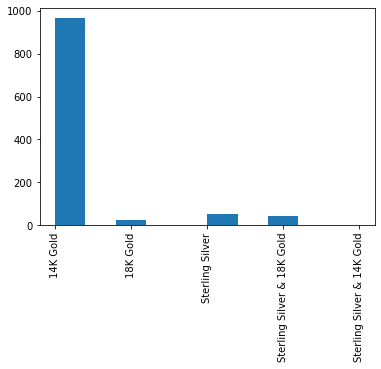

In [40]:
_ = plt.hist(df_rings['Metal'])
plt.xticks(rotation=90)

plt.show()

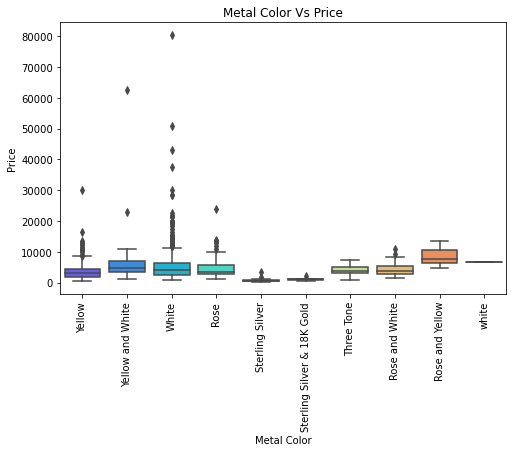

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Metal Color',y='Price',data=df_rings, palette='rainbow')
plt.title("Metal Color Vs Price")
plt.xticks(rotation=90)
plt.show()

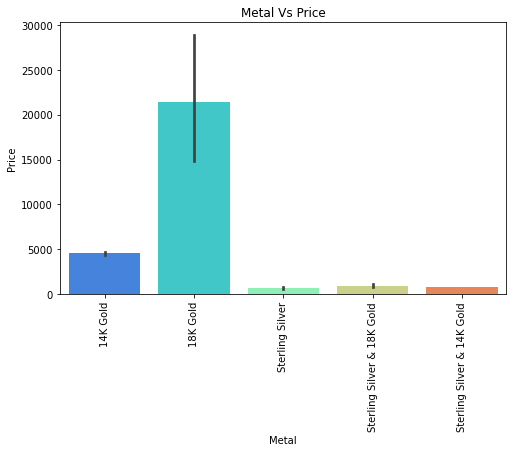

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x='Metal',y='Price',data=df_rings, palette='rainbow')
plt.title("Metal Vs Price")
plt.xticks(rotation=90)
plt.show()

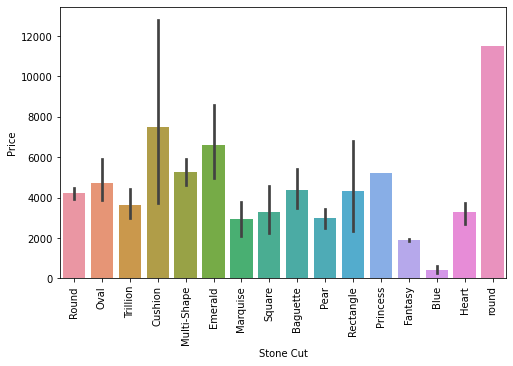

In [43]:
sns.color_palette("flare", as_cmap=True)
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Cut',y='Price',data=df_rings)
plt.xlabel('Stone Cut')
#plt.title("Stone1 Cut Vs Price")
plt.xticks(rotation=90)
plt.show()

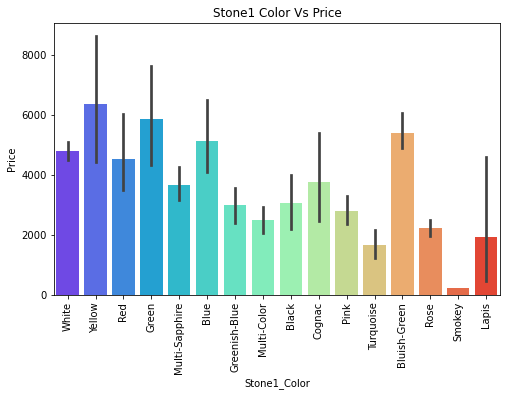

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Color',y='Price',data=df_rings, palette='rainbow')
plt.title("Stone1 Color Vs Price")
plt.xticks(rotation=90)
plt.show()

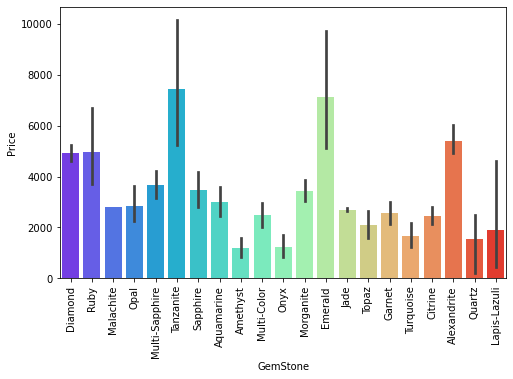

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Stone',y='Price',data=df_rings,palette='rainbow')
#plt.title("Stone1 Vs Price")
plt.xlabel('GemStone')
plt.xticks(rotation=90)
plt.show()

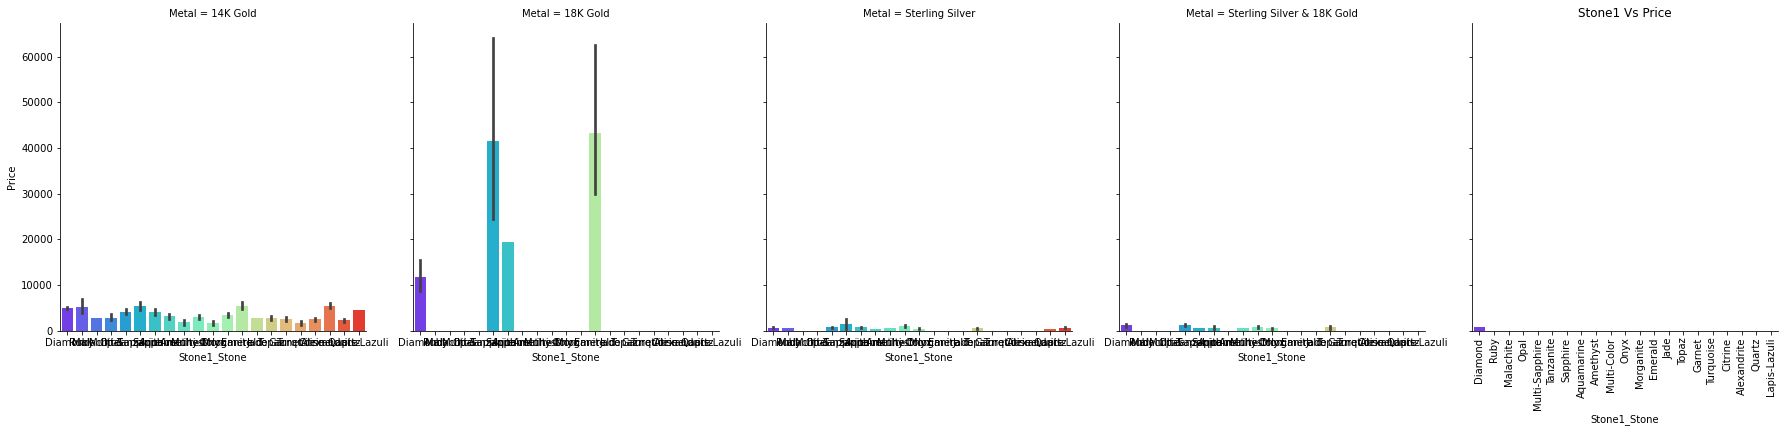

In [46]:
#plt.figure(figsize=(8,5))
sns.catplot(x='Stone1_Stone',y='Price',data=df_rings,col='Metal',palette='rainbow',kind='bar', )
plt.title("Stone1 Vs Price")
plt.xticks(rotation=90)
plt.show()

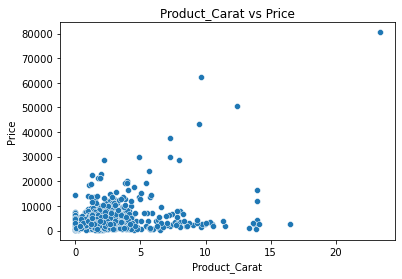

In [47]:
sns.scatterplot(x='Product_Carat', y='Price',data=df_rings)
_ = plt.title('Product_Carat vs Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

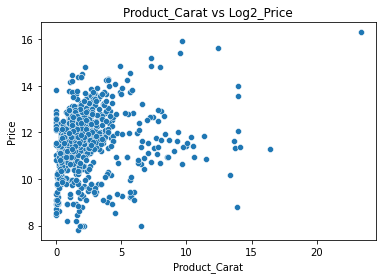

In [48]:
sns.scatterplot(x='Product_Carat', y=np.log2(df_rings['Price']),data=df_rings)
_ = plt.title('Product_Carat vs Log2_Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

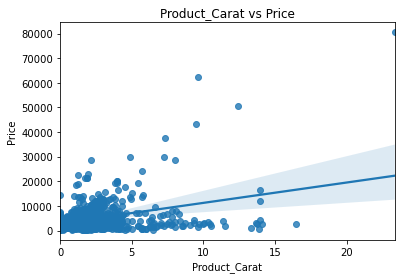

In [49]:
sns.regplot(x='Product_Carat', y='Price',data=df_rings)
_ = plt.title('Product_Carat vs Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

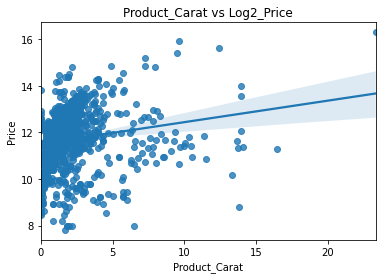

In [50]:
sns.regplot(x='Product_Carat', y=np.log2(df_rings['Price']),data=df_rings)
_ = plt.title('Product_Carat vs Log2_Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

## Pre-processing & Training Data Development

In [51]:
df_rings.columns

Index(['Description', 'Discount_Price', 'Price', 'Metal', 'Metal Color',
       'Stones', 'Jewelry_Type', 'Product_Carat', 'Stone1_Desc',
       'Stone1_Carat', 'Stone1_Stone', 'Stone1_Color', 'Stone1_Cut',
       'Stone2_Desc', 'Stone2_Carat', 'Stone2_Stone', 'Stone2_Color',
       'Stone2_Cut'],
      dtype='object')

In [52]:
df_rings.isnull().sum()

Description         0
Discount_Price      0
Price               0
Metal               0
Metal Color         0
Stones              0
Jewelry_Type        0
Product_Carat       0
Stone1_Desc         0
Stone1_Carat        0
Stone1_Stone        0
Stone1_Color        0
Stone1_Cut          0
Stone2_Desc       519
Stone2_Carat      519
Stone2_Stone      519
Stone2_Color      519
Stone2_Cut        519
dtype: int64

In [53]:
df_rings['Stone2_Carat'].fillna(0, inplace=True)

In [54]:
#Check distribution of Stone1
df_rings['Stone1_Stone'].value_counts()

Diamond           554
Sapphire           77
Tanzanite          76
Emerald            68
Multi-Sapphire     61
Ruby               52
Multi-Color        36
Topaz              27
Morganite          24
Aquamarine         20
Amethyst           17
Onyx               16
Opal               15
Garnet             12
Citrine            11
Turquoise           8
Alexandrite         5
Quartz              3
Lapis-Lazuli        3
Jade                2
Malachite           1
Name: Stone1_Stone, dtype: int64

In [55]:
#For diamonds what is the type of stone cut
df_rings[['Stone1_Cut']][df_rings['Stone1_Stone'] == 'Diamond'].value_counts()

Stone1_Cut 
Round          478
Multi-Shape     65
Baguette         5
Cushion          4
round            1
Pear             1
dtype: int64

In [56]:
#For diamonds what is the type of stone color
df_rings[['Stone1_Color']][df_rings['Stone1_Stone'] == 'Diamond'].value_counts()

Stone1_Color
White           501
Yellow           20
Black            18
Cognac           12
Blue              3
dtype: int64

In [57]:
#For diamonds what is the type of stone carat
#df_rings[['Stone1_Carat']][df_rings['Stone1_Stone'] == 'Diamond'].value_counts()

In [58]:
#Check distribution of Stone2
df_rings['Stone2_Stone'].value_counts()

Diamond           514
Emerald            21
Tsavorite          10
Sapphire            9
Ruby                3
Multi-Sapphire      3
Topaz               2
Garnet              2
Width;              2
Peridot             2
Amethyst            1
Name: Stone2_Stone, dtype: int64

In [59]:
#For diamonds what is the type of stone cut
df_rings[['Stone2_Cut']][df_rings['Stone2_Stone'] == 'Diamond'].value_counts()

Stone2_Cut 
Round          477
Multi-Shape     35
oval             1
Baguette         1
dtype: int64

In [60]:
#For diamonds what is the type of stone color
df_rings[['Stone2_Color']][df_rings['Stone2_Stone'] == 'Diamond'].value_counts()

Stone2_Color
White           497
Cognac            9
Black             7
Blue              1
dtype: int64

In [61]:
#For diamonds what is the type of stone carat
#df_rings[['Stone2_Carat']][df_rings['Stone2_Stone'] == 'Diamond'].value_counts()

In [62]:
writer = pd.ExcelWriter('/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/raw/All_EDA_Rings.xlsx')

#Write Rings Data 
df_rings.to_excel(writer, 'Rings_data')
writer.save()

In [63]:
#Group by Stone1, Price Columns 

gscp = df_rings[['Stone1_Stone', 'Price']].groupby(['Stone1_Stone','Price']).size().reset_index(name='counts')
#gscp
#gscp.to_excel(writer, 'Stone1_Carat')
#writer.save()


In [64]:
#Group by Stone1, Price Columns 

gscp = df_rings[['Stone1_Stone', 'Price']].groupby(['Stone1_Stone']).size().reset_index(name='counts')
#gscp

In [65]:
#Group by Stone1, Carat Columns 

gsca = df_rings[['Stone1_Stone', 'Stone1_Carat']].groupby(['Stone1_Stone','Stone1_Carat']).size().reset_index(name='counts')
#gsca
gsca.to_excel(writer, 'Stone1_Carat')
writer.save()


In [66]:
#Group by Stone1 and Carat Columns
gscm = df_rings[['Stone1_Stone', 'Stone1_Carat']].groupby(['Stone1_Stone']).agg(['min','max','count'])
gscm

#gscm.to_excel(writer,'Stone1_Carat_Aggregates')
#writer.save()

Stone1_Carat             
                        min    max count
Stone1_Stone                            
Alexandrite            0.33   1.00     5
Amethyst               0.70   7.75    17
Aquamarine             0.71   6.85    20
Citrine                3.10   9.79    11
Diamond                0.01   4.62   554
Emerald                0.46   8.72    68
Garnet                 1.23   7.85    12
Jade                  10.40  13.85     2
Lapis-Lazuli           5.24  13.85     3
Malachite              2.10   2.10     1
Morganite              1.15   6.15    24
Multi-Color            0.55  10.13    36
Multi-Sapphire         0.76  13.63    61
Onyx                   0.12  16.80    16
Opal                   0.55   5.05    15
Quartz                 0.83  16.25     3
Ruby                   0.28   7.17    52
Sapphire               0.12  13.11    77
Tanzanite              0.66  21.16    76
Topaz                  0.81  13.90    27
Turquoise              0.25   2.35     8

In [67]:
#Group by Stone1 and Cut Columns
gscu = df_rings[['Stone1_Stone', 'Stone1_Cut']].groupby(['Stone1_Stone','Stone1_Cut']).size().reset_index(name='counts')
#gscu
gscu.to_excel(writer,'Stone1_Cut')
writer.save()

In [68]:
#Group by Stone1 and Color Columns
gsco = df_rings[['Stone1_Stone', 'Stone1_Color']].groupby(['Stone1_Stone','Stone1_Color']).size().reset_index(name='counts')
#gsco
gsco.to_excel(writer, 'Stone1_Color')
writer.save()

In [69]:
#Group by Stone2, Carat Columns 
gsca = df_rings[['Stone2_Stone', 'Stone2_Carat']].groupby(['Stone2_Stone','Stone2_Carat']).size().reset_index(name='counts')
#gsca
gsca.to_excel(writer, 'Stone2_Carat')
writer.save()

In [70]:
#Group by Stone2 and Carat Columns
gscm = df_rings[['Stone2_Stone', 'Stone2_Carat']].groupby(['Stone2_Stone']).agg(['min','max','count'])
#gscm
gscm.to_excel(writer,'Stone2_Carat_Aggregates')
writer.save()

In [71]:
#Group by Stone2 and Cut Columns
gscu = df_rings[['Stone2_Stone', 'Stone2_Cut']].groupby(['Stone2_Stone','Stone2_Cut']).size().reset_index(name='counts')
#gscu
gscu.to_excel(writer,'Stone2_Cut')
writer.save()

In [72]:
#Group by Stone2 and Color Columns
gsco = df_rings[['Stone2_Stone', 'Stone2_Color']].groupby(['Stone2_Stone','Stone2_Color']).size().reset_index(name='counts')
#gsco
gsco.to_excel(writer, 'Stone2_Color')
writer.save()

In [73]:
#Drop unwanted columns
df_rings_1 = df_rings.drop(['Description','Discount_Price', 'Stones', 'Jewelry_Type','Stone1_Desc','Stone2_Desc','Product_Carat', 'Metal Color'],axis=1)

In [74]:
#Split the Price column into Categories

df_rings_1['Price_Category'] =  pd.cut(df_rings_1['Price'], 
               bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,np.inf], 
             labels=['1000','2000','3000','4000','5000','6000','7000','8000','9000','Above 9000'])

df_rings_1 = df_rings_1.drop('Price',axis=1)

In [75]:
#Check the range of Stone1 Carat
df_rings_1['Stone1_Carat_cat'] = pd.cut(df_rings_1['Stone1_Carat'], 
                                      bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], 
                                      labels=['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0'])

df_rings_1 = df_rings_1.drop('Stone1_Carat',axis=1)


In [76]:
df_rings_1['Stone2_Carat_cat'] = pd.cut(df_rings_1['Stone2_Carat'], 
                                      bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], 
                                      labels=['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0'])

df_rings_1 = df_rings_1.drop('Stone2_Carat',axis=1)


In [77]:
df_rings_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 413 to 1516
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Metal             1088 non-null   object  
 1   Stone1_Stone      1088 non-null   object  
 2   Stone1_Color      1088 non-null   object  
 3   Stone1_Cut        1088 non-null   object  
 4   Stone2_Stone      569 non-null    object  
 5   Stone2_Color      569 non-null    object  
 6   Stone2_Cut        569 non-null    object  
 7   Price_Category    1088 non-null   category
 8   Stone1_Carat_cat  1007 non-null   category
 9   Stone2_Carat_cat  564 non-null    category
dtypes: category(3), object(7)
memory usage: 112.4+ KB


In [78]:
#df_diamondrings[['Stone1_Stone', 'Metal']].groupby(['Stone1_Stone']).agg(['min','max','count'])
#df_rings_1[['Metal']].groupby(['Metal']).size().reset_index(name='counts')
#df_rings_1[df_rings_1['Metal'] == 'Sterling Silver']

In [79]:
#df_rings_1.drop(df_rings_1[df_rings_1['Metal'] == 'Sterling Silver'].index,inplace=True)
#df_rings_1.drop(df_rings_1[df_rings_1['Metal'] == 'Sterling Silver & 14K Gold'].index,inplace=True)
#df_rings_1.drop(df_rings_1[df_rings_1['Metal'] == 'Sterling Silver & 18K Gold'].index,inplace=True)
#df_rings_1.drop(df_rings_1[df_rings_1['Metal'] == '18K Gold'].index,inplace=True)


In [80]:
#Since majority of the Stone1 data is Diamond. Splitting the data into Diamonds and other gemstones
df_otherrings = df_rings_1.loc[(df_rings_1['Stone1_Stone'] != 'Diamond')]
df_diamondrings = df_rings_1.loc[(df_rings_1['Stone1_Stone'] == 'Diamond')]                              

In [81]:
gscd = df_diamondrings[['Stone1_Stone', 'Price_Category']].groupby(['Stone1_Stone','Price_Category']).size().reset_index(name='counts')
#gscd.to_excel(writer, 'Stone1_Diamond_Price_Category')
#writer.save()http://localhost:8888/notebooks/SpringBoard/DataScience_Capstone2/notebooks/Effy_EDA_Rings.ipynb#


In [82]:
df_otherrings[df_otherrings['Stone1_Carat_cat'].isnull()]

,Metal,Stone1_Stone,Stone1_Color,Stone1_Cut,Stone2_Stone,Stone2_Color,Stone2_Cut,Price_Category,Stone1_Carat_cat,Stone2_Carat_cat
427,14K Gold,Multi-Sapphire,Multi-Sapphire,Multi-Shape,Diamond,White,Round,7000,NaN,0.5
433,14K Gold,Multi-Sapphire,Multi-Sapphire,Oval,Diamond,White,Round,4000,NaN,0.5
436,14K Gold,Sapphire,Blue,Round,Diamond,White,Round,Above 9000,NaN,1.0
438,14K Gold,Amethyst,Green,Marquise,Diamond,White,Round,2000,NaN,0.5
450,18K Gold,Tanzanite,Blue,Cushion,Diamond,White,Round,Above 9000,NaN,2.5
611,14K Gold,Onyx,Black,Fantasy,Diamond,White,Round,2000,NaN,0.5
652,14K Gold,Ruby,Red,Cushion,Diamond,White,Round,Above 9000,NaN,2.5
653,18K Gold,Tanzanite,Blue,Oval,Diamond,White,Round,Above 9000,NaN,5.0
660,14K Gold,Onyx,Black,Oval,Diamond,White,Round,3000,NaN,0.5
669,14K Gold,Jade,Black,Oval,Diamond,White,Round,3000,NaN,0.5


In [83]:
gsco = df_otherrings[['Stone1_Stone', 'Price_Category']].groupby(['Stone1_Stone','Price_Category']).size().reset_index(name='counts')
#gsco.to_excel(writer, 'Stone1_Other_Price_Category')
#writer.save()



In [84]:

df_otherrings.to_csv("/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/raw/gemstones.csv", index=False, header=True)
df_diamondrings.to_csv("/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/raw/diamonds.csv", index=False, header=True)

## Applying the Machine Learning models:


Following classification models are used:
1. Logistic Regression
2. Random Forest
3. Stochastic Gradient Descent
4. K-Nearest Neighbor(KNN)


The model evaluation is based on splitting the data into training and test datasets. 

Since the dataset is not too large, GridSearchCV is used for hyperparameter tuning. GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.


Evaluation of the Model is done using Confusion Matrix and Classification Report


In [85]:
#Data is split features and target variable

X = df_diamondrings.drop(columns='Price_Category')
y = df_diamondrings.Price_Category

In [86]:
#Convert Categorical data to integer data using One Hot Encoding

df_dummy_rings = pd.get_dummies(X)
df_dummy_rings.shape

(554, 63)

In [87]:
#List of the columns after one hot encoding
print(df_dummy_rings.columns.tolist())

['Metal_14K Gold', 'Metal_18K Gold', 'Metal_Sterling Silver', 'Metal_Sterling Silver & 14K Gold', 'Metal_Sterling Silver & 18K Gold', 'Stone1_Stone_Diamond', 'Stone1_Color_Black', 'Stone1_Color_Blue', 'Stone1_Color_Cognac', 'Stone1_Color_White', 'Stone1_Color_Yellow', 'Stone1_Cut_Baguette', 'Stone1_Cut_Cushion', 'Stone1_Cut_Multi-Shape', 'Stone1_Cut_Pear', 'Stone1_Cut_Round', 'Stone1_Cut_round', 'Stone2_Stone_Diamond', 'Stone2_Stone_Emerald', 'Stone2_Stone_Garnet', 'Stone2_Stone_Multi-Sapphire', 'Stone2_Stone_Ruby', 'Stone2_Stone_Sapphire', 'Stone2_Stone_Topaz', 'Stone2_Stone_Tsavorite', 'Stone2_Stone_Width;', 'Stone2_Color_ ', 'Stone2_Color_Black', 'Stone2_Color_Blue', 'Stone2_Color_Cognac', 'Stone2_Color_Green', 'Stone2_Color_Multi-Sapphire', 'Stone2_Color_Red', 'Stone2_Color_White', 'Stone2_Cut_Baguette', 'Stone2_Cut_Cushion', 'Stone2_Cut_Marquise', 'Stone2_Cut_Multi-Shape', 'Stone2_Cut_Oval', 'Stone2_Cut_Princess', 'Stone2_Cut_Round', 'Stone2_Cut_Top', 'Stone2_Cut_round', 'Stone1_C

In [88]:
#Split your data into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(df_dummy_rings, y, test_size=0.3, 
                                                    random_state=47)

In [89]:
X_train.shape, X_test.shape

((387, 63), (167, 63))

In [90]:
df_diamondrings[['Metal']].groupby(['Metal']).size().reset_index(name='counts')


,Metal,counts
0,14K Gold,508
1,18K Gold,17
2,Sterling Silver,7
3,Sterling Silver & 14K Gold,1
4,Sterling Silver & 18K Gold,21


In [91]:
df_diamondrings[df_diamondrings['Metal'] == 'Sterling Silver']

,Metal,Stone1_Stone,Stone1_Color,Stone1_Cut,Stone2_Stone,Stone2_Color,Stone2_Cut,Price_Category,Stone1_Carat_cat,Stone2_Carat_cat
500,Sterling Silver,Diamond,White,Round,NaN,NaN,NaN,1000,0.5,NaN
917,Sterling Silver,Diamond,White,Round,Topaz,Blue,Cushion,1000,0.5,5.0
1029,Sterling Silver,Diamond,White,Round,Tsavorite,Green,Round,1000,0.5,0.5
1051,Sterling Silver,Diamond,White,Round,NaN,NaN,NaN,1000,0.5,NaN
1116,Sterling Silver,Diamond,White,Round,NaN,NaN,NaN,1000,0.5,NaN
1149,Sterling Silver,Diamond,White,Round,NaN,NaN,NaN,1000,0.5,NaN
1376,Sterling Silver,Diamond,White,Round,Tsavorite,Green,Round,1000,0.5,0.5


## Logistic Regression For Diamonds dataset


In [92]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#LogisticRegression with a random state of 47

from sklearn.linear_model import LogisticRegression


LR_pipe = make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler(),
            LogisticRegression(random_state=47))

#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 3-fold cross-validation
lr_default_cv_results = cross_validate(LR_pipe, X_train, y_train, cv=3)
lr_cv_scores = lr_default_cv_results['test_score']

print("Cross Validation Train Score: ",lr_cv_scores)
print('Mean Cross Validation train score: ', np.mean(lr_cv_scores))
print('Standard deviation CV train score: ', np.std(lr_cv_scores))

Cross Validation Train Score:  [0.34883721 0.33333333 0.37984496]
Mean Cross Validation train score:  0.3540051679586564
Standard deviation CV train score:  0.019336730681002293


## Hyperparameter tuning for Logistic Regression using GridSearchCV

In [93]:
#from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
#cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

#print the best parameters
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with:%r" % (mean, stdev, param))

Best: 0.364341 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


## Fitting the Logistic Regression with the optimal hyperparameters



Train Accuracy Scores:  [0.36434109 0.3255814  0.40310078]
Mean Cross Validation train score:  0.3643410852713178
Standard deviation CV train score:  0.03164715429952425


Test Accuracy Scores:  [0.30357143 0.28571429 0.30909091]
Mean Cross Validation train score:  0.2994588744588744
Standard deviation CV train score:  0.009976688031594384


Precision Score:  0.3216344113402937
Recall Score: 0.32110046957873045


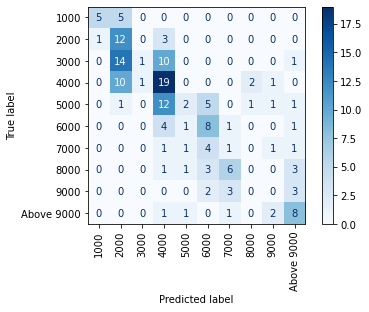



              precision    recall  f1-score   support

        1000       0.83      0.50      0.62        10
        2000       0.29      0.75      0.41        16
        3000       0.50      0.04      0.07        26
        4000       0.37      0.58      0.45        33
        5000       0.33      0.09      0.14        23
        6000       0.36      0.53      0.43        15
        7000       0.08      0.11      0.10         9
        8000       0.00      0.00      0.00        14
        9000       0.00      0.00      0.00         8
  Above 9000       0.44      0.62      0.52        13

    accuracy                           0.34       167
   macro avg       0.32      0.32      0.27       167
weighted avg       0.35      0.34      0.28       167



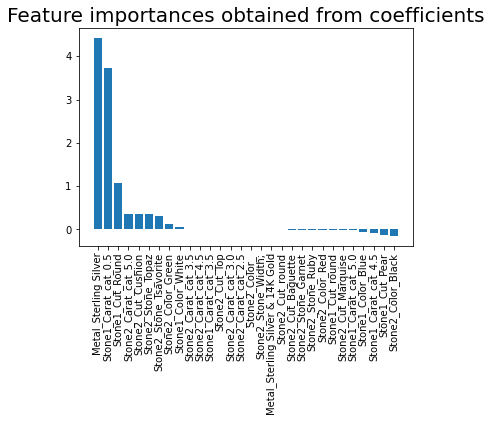

In [94]:
#Use the best parameters found 

logr = LogisticRegression(C=100, penalty= 'l2', solver = 'liblinear')
logr.fit(X_train,y_train)
importances = pd.DataFrame(data={'Attribute':X_train.columns, 'Importance':logr.coef_[0]})
importances = importances.sort_values(by='Importance',ascending=False)

from sklearn.model_selection import cross_val_score

logr_train_scores = cross_val_score(logr,X_train,y_train,cv=3,scoring='accuracy')

print('\n')
print("Train Accuracy Scores: ", logr_train_scores)
print('Mean Cross Validation train score: ', np.mean(logr_train_scores))
print('Standard deviation CV train score: ', np.std(logr_train_scores))

#Predict the test data 
y_pred = logr.predict(X_test)

logr_test_scores = cross_val_score(logr,X_test,y_test,cv=3,scoring='accuracy')
print('\n')
print("Test Accuracy Scores: ", logr_test_scores)
print('Mean Cross Validation train score: ', np.mean(logr_test_scores))
print('Standard deviation CV train score: ', np.std(logr_test_scores))

from sklearn.metrics import precision_score, recall_score

precision_lr = precision_score(y_test, y_pred, average='macro')
recall_lr = recall_score(y_test,y_pred, average='macro')
print('\n')
print('Precision Score: ', precision_lr)
print('Recall Score:', recall_lr)

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logr, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()

from sklearn.metrics import classification_report

print('\n')
print(classification_report(y_test, y_pred))

plt.bar(x=importances['Attribute'][:30], height=importances['Importance'][:30])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Random Forest Model For Diamond Data Set

In [95]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#RandomForestClassifier with a random state of 47

from sklearn.ensemble import RandomForestClassifier

RF_pipe = make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler(),
            RandomForestClassifier(random_state=47))

#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 3-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=3)
rf_cv_scores = rf_default_cv_results['test_score']

print("Cross Validation Train Score: ",rf_cv_scores)
print('Mean Cross Validation train score: ', np.mean(rf_cv_scores))
print('Standard deviation CV train score: ', np.std(rf_cv_scores))

Cross Validation Train Score:  [0.37984496 0.31782946 0.35658915]
Mean Cross Validation train score:  0.351421188630491
Standard deviation CV train score:  0.02558009027548234


## Hyperparameter tuning for Random Forest using GridSearchCV

In [96]:
#Setting the grid parameters

n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'randomforestclassifier__criterion': ['entropy','gini'],
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
#grid_params

#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 3-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=3, n_jobs=-1)

#Call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. 
rf_grid_cv.fit(X_train, y_train)

#Print the best params (`best_params_` attribute) from the grid search
print('Best Parameters:\n ', rf_grid_cv.best_params_ )

rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=3)
rf_best_scores = rf_best_cv_results['test_score']

print('\n')
print("Cross Validation Train Score: ",rf_best_scores)
print('Mean Cross Validation train score: ', np.mean(rf_best_scores))
print('Standard deviation CV train score: ', np.std(rf_best_scores))



Best Parameters:
  {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 483, 'simpleimputer__strategy': 'mean', 'standardscaler': StandardScaler()}


Cross Validation Train Score:  [0.40310078 0.3255814  0.39534884]
Mean Cross Validation train score:  0.37467700258397935
Standard deviation CV train score:  0.034859786985095696


## Fitting the Random Forest Classifier with the optimal hyperparameters



The Accuracy score of Random Forest prediction:  0.3473053892215569
Precision Score:  0.284585484391385
Recall Score:  0.35206682206682205


              precision    recall  f1-score   support

        1000       0.86      0.60      0.71        10
        2000       0.32      0.88      0.47        16
        3000       0.14      0.04      0.06        26
        4000       0.37      0.55      0.44        33
        5000       0.00      0.00      0.00        23
        6000       0.35      0.53      0.42        15
        7000       0.08      0.11      0.10         9
        8000       0.00      0.00      0.00        14
        9000       0.17      0.12      0.14         8
  Above 9000       0.56      0.69      0.62        13

    accuracy                           0.35       167
   macro avg       0.28      0.35      0.30       167
weighted avg       0.26      0.35      0.28       167



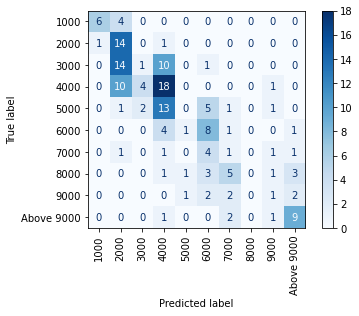

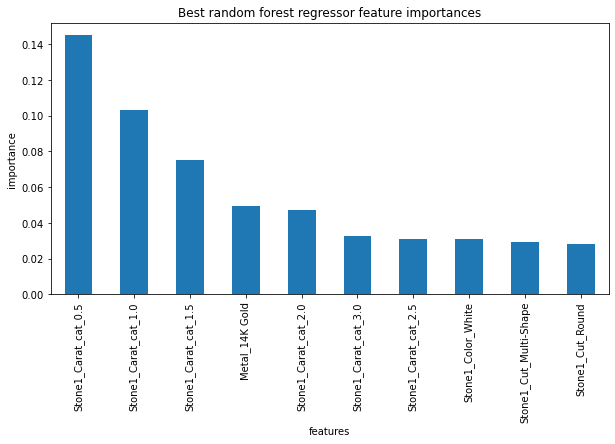

In [97]:

#Predict on the test data

rf_clf = rf_grid_cv.best_estimator_

y_pred_rf = rf_clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test,y_pred_rf, average='macro')
print('\n')
print('The Accuracy score of Random Forest prediction: ',accuracy_score(y_test, y_pred_rf))
print('Precision Score: ', precision_rf)
print('Recall Score: ', recall_rf)

print('\n')
print(classification_report(y_test, y_pred_rf))


plot_confusion_matrix(rf_grid_cv, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()


#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestclassifier` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.head(10).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');
plt.show()


## Stochastic Gradient Descent (SGD) for the Diamond DataSet

Train Accuracy Scores:  [0.35658915 0.27131783 0.31782946]
Mean Cross Validation train score:  0.3152454780361757
Standard deviation CV train score:  0.03485978698509573


Test Accuracy Scores:  [0.375      0.28571429 0.29090909]
Mean Cross Validation test score:  0.3172077922077922
Standard deviation CV test score:  0.040920255468217585


Precision Score:  0.4249284049284049
Recall Score: 0.3275520855955638


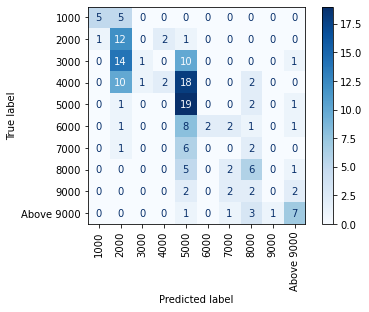



              precision    recall  f1-score   support

        1000       0.83      0.50      0.62        10
        2000       0.27      0.75      0.40        16
        3000       0.50      0.04      0.07        26
        4000       0.50      0.06      0.11        33
        5000       0.27      0.83      0.41        23
        6000       1.00      0.13      0.24        15
        7000       0.00      0.00      0.00         9
        8000       0.33      0.43      0.38        14
        9000       0.00      0.00      0.00         8
  Above 9000       0.54      0.54      0.54        13

    accuracy                           0.32       167
   macro avg       0.42      0.33      0.28       167
weighted avg       0.45      0.32      0.26       167



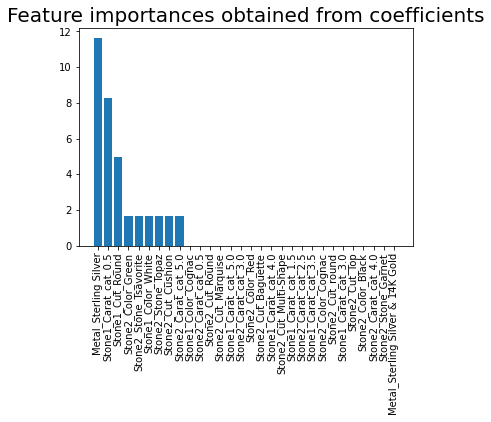

In [98]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

sgd_train_scores = cross_val_score(sgd_clf, X_train, y_train, cv=3,scoring='accuracy')

print("Train Accuracy Scores: ", sgd_train_scores)
print('Mean Cross Validation train score: ', np.mean(sgd_train_scores))
print('Standard deviation CV train score: ', np.std(sgd_train_scores))

sgd_test_scores = cross_val_score(sgd_clf, X_test, y_test, cv=3,scoring='accuracy')
print('\n')
print("Test Accuracy Scores: ", sgd_test_scores)
print('Mean Cross Validation test score: ', np.mean(sgd_test_scores))
print('Standard deviation CV test score: ', np.std(sgd_test_scores))

y_pred_sgd = sgd_clf.predict(X_test)

precision_sgd = precision_score(y_test, y_pred_sgd, average='macro')
recall_sgd = recall_score(y_test,y_pred_sgd, average='macro')
print('\n')
print('Precision Score: ', precision_sgd)
print('Recall Score:', recall_sgd)

plot_confusion_matrix(sgd_clf, X_test, y_test,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()
print('\n')
print(classification_report(y_test, y_pred_sgd))

importances_sgd = pd.DataFrame(data={'Attribute':X_train.columns, 'Importance':sgd_clf.coef_[0]})
importances_sgd = importances_sgd.sort_values(by='Importance',ascending=False)

plt.bar(x=importances_sgd['Attribute'][:30], height=importances_sgd['Importance'][:30])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


## KNeighbors Classifer for the Diamond DataSet

Train Accuracy Scores:  [0.27906977 0.25581395 0.37984496]
Mean Cross Validation train score:  0.3049095607235142
Standard deviation CV train score:  0.0538311799896632


Test Accuracy Scores:  [0.25       0.25       0.32727273]
Mean Cross Validation test score:  0.27575757575757576
Standard deviation CV test score:  0.03642671297021608


Precision Score:  0.31043650793650795
Recall Score: 0.3275520855955638


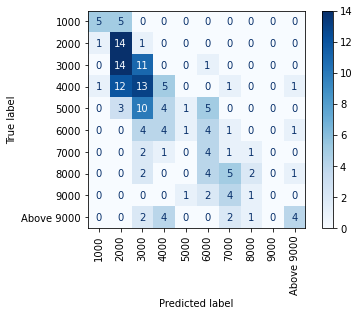



              precision    recall  f1-score   support

        1000       0.71      0.50      0.59        10
        2000       0.29      0.88      0.44        16
        3000       0.24      0.42      0.31        26
        4000       0.28      0.15      0.20        33
        5000       0.33      0.04      0.08        23
        6000       0.20      0.27      0.23        15
        7000       0.07      0.11      0.09         9
        8000       0.40      0.14      0.21        14
        9000       0.00      0.00      0.00         8
  Above 9000       0.57      0.31      0.40        13

    accuracy                           0.28       167
   macro avg       0.31      0.28      0.25       167
weighted avg       0.31      0.28      0.25       167



In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)


knn_train_scores = cross_val_score(knn_clf, X_train, y_train, cv=3,scoring='accuracy')

print("Train Accuracy Scores: ", knn_train_scores)
print('Mean Cross Validation train score: ', np.mean(knn_train_scores))
print('Standard deviation CV train score: ', np.std(knn_train_scores))

knn_test_scores = cross_val_score(knn_clf, X_test, y_test, cv=3,scoring='accuracy')
print('\n')
print("Test Accuracy Scores: ", knn_test_scores)
print('Mean Cross Validation test score: ', np.mean(knn_test_scores))
print('Standard deviation CV test score: ', np.std(knn_test_scores))

y_pred_knn = knn_clf.predict(X_test)

precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test,y_pred_sgd, average='macro')
print('\n')
print('Precision Score: ', precision_knn)
print('Recall Score:', recall_knn)

plot_confusion_matrix(knn_clf, X_test, y_test,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()
print('\n')
print(classification_report(y_test, y_pred_knn))


## Comparing the models

In [100]:
Labels = [ 'Logistic Regression','Random Forest','Stochastic Gradient Descent', 'KNN']

precision_test = [precision_lr, precision_rf,precision_sgd,precision_knn]
recall_test =[recall_lr, recall_rf,recall_sgd,recall_knn]


matrix = pd.DataFrame(list(zip(Labels, precision_test, recall_test)), 
               columns =['Algorithm', 'Precision Score', 'Recall score' ]) 
print(matrix)



                     Algorithm  Precision Score  Recall score
0          Logistic Regression         0.321634      0.321100
1                Random Forest         0.284585      0.352067
2  Stochastic Gradient Descent         0.424928      0.327552
3                          KNN         0.310437      0.327552


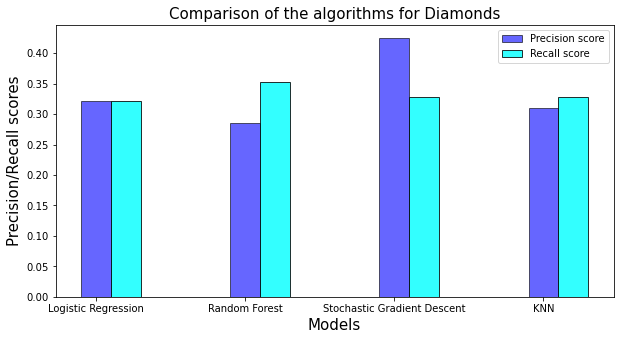

In [101]:
#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4]
index_acc=[1.2,2.2,3.2,4.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Precision/Recall scores',fontsize=15)
plt.title('Comparison of the algorithms for Diamonds',fontsize=15)
_=plt.bar(index, precision_test,color='b',alpha=0.6,label='Precision score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,recall_test,color='cyan',alpha=0.8,label='Recall score',edgecolor='k',width=0.2)

#_=plt.bar(index,precision_test)
plt.xticks([1, 2,3,4], Labels)
plt.legend()
plt.savefig("27.png")
plt.show()

## Logistic Regression For Gemstones dataset

In [102]:
#Data is split features and target variable

X = df_otherrings.drop(columns='Price_Category')
y = df_otherrings.Price_Category

#Convert Categorical data to integer data using One Hot Encoding
df_dummy_rings = pd.get_dummies(X)

#Split your data into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(df_dummy_rings, y, test_size=0.3, 
                                                    random_state=47)

In [103]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#LogisticRegression with a random state of 47

from sklearn.linear_model import LogisticRegression


LR_pipe = make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler(),
            LogisticRegression(random_state=47))

#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 3-fold cross-validation
lr_default_cv_results = cross_validate(LR_pipe, X_train, y_train, cv=3)
lr_cv_scores = lr_default_cv_results['test_score']

print("Cross Validation Train Score: ",lr_cv_scores)
print('Mean Cross Validation train score: ', np.mean(lr_cv_scores))
print('Standard deviation CV train score: ', np.std(lr_cv_scores))

Cross Validation Train Score:  [0.344      0.37903226 0.44354839]
Mean Cross Validation train score:  0.38886021505376345
Standard deviation CV train score:  0.04123034398214639


## Hyperparameter tuning for Logistic Regression using GridSearchCV

In [104]:
#from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
#cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

#print the best parameters
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with:%r" % (mean, stdev, param))

Best: 0.394172 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


## Fitting the Logistic Regression with the optimal hyperparameters



Train Accuracy Scores:  [0.344      0.36290323 0.42741935]
Mean Cross Validation train score:  0.37810752688172045
Standard deviation CV train score:  0.03571251198872468


Test Accuracy Scores:  [0.31481481 0.27777778 0.33962264]
Mean Cross Validation train score:  0.31073841136734215
Standard deviation CV train score:  0.025412065261691538


Precision Score:  0.3819607843137255
Recall Score: 0.31707077507703935


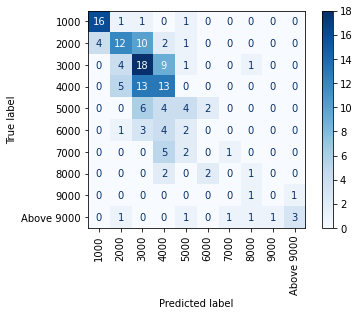



              precision    recall  f1-score   support

        1000       0.80      0.84      0.82        19
        2000       0.50      0.41      0.45        29
        3000       0.35      0.55      0.43        33
        4000       0.33      0.42      0.37        31
        5000       0.33      0.25      0.29        16
        6000       0.00      0.00      0.00        10
        7000       0.50      0.12      0.20         8
        8000       0.25      0.20      0.22         5
        9000       0.00      0.00      0.00         2
  Above 9000       0.75      0.38      0.50         8

    accuracy                           0.42       161
   macro avg       0.38      0.32      0.33       161
weighted avg       0.42      0.42      0.41       161



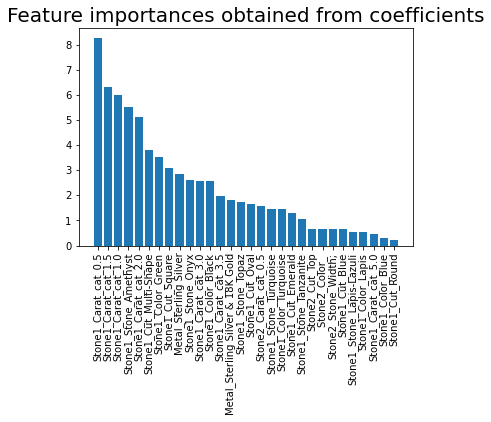

In [105]:
#Use the best parameters found 

logr = LogisticRegression(C=100, penalty= 'l2', solver = 'liblinear')
logr.fit(X_train,y_train)
importances = pd.DataFrame(data={'Attribute':X_train.columns, 'Importance':logr.coef_[0]})
importances = importances.sort_values(by='Importance',ascending=False)

from sklearn.model_selection import cross_val_score

logr_train_scores = cross_val_score(logr,X_train,y_train,cv=3,scoring='accuracy')

print('\n')
print("Train Accuracy Scores: ", logr_train_scores)
print('Mean Cross Validation train score: ', np.mean(logr_train_scores))
print('Standard deviation CV train score: ', np.std(logr_train_scores))

#Predict the test data 
y_pred = logr.predict(X_test)

logr_test_scores = cross_val_score(logr,X_test,y_test,cv=3,scoring='accuracy')
print('\n')
print("Test Accuracy Scores: ", logr_test_scores)
print('Mean Cross Validation train score: ', np.mean(logr_test_scores))
print('Standard deviation CV train score: ', np.std(logr_test_scores))

from sklearn.metrics import precision_score, recall_score

precision_lr = precision_score(y_test, y_pred, average='macro')
recall_lr = recall_score(y_test,y_pred, average='macro')
print('\n')
print('Precision Score: ', precision_lr)
print('Recall Score:', recall_lr)

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logr, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()

from sklearn.metrics import classification_report

print('\n')
print(classification_report(y_test, y_pred))

plt.bar(x=importances['Attribute'][:30], height=importances['Importance'][:30])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Random Forest Model For Gemstone Dataset

In [106]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#RandomForestClassifier with a random state of 47

from sklearn.ensemble import RandomForestClassifier

RF_pipe = make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler(),
            RandomForestClassifier(random_state=47))

#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 3-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=3)
rf_cv_scores = rf_default_cv_results['test_score']

print("Cross Validation Train Score: ",rf_cv_scores)
print('Mean Cross Validation train score: ', np.mean(rf_cv_scores))
print('Standard deviation CV train score: ', np.std(rf_cv_scores))

Cross Validation Train Score:  [0.352      0.36290323 0.36290323]
Mean Cross Validation train score:  0.3592688172043011
Standard deviation CV train score:  0.005139829936366747


## Hyperparameter tuning for Random Forest using GridSearchCV

In [107]:
#Setting the grid parameters

n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'randomforestclassifier__criterion': ['entropy','gini'],
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
#grid_params

#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 3-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=3, n_jobs=-1)

#Call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. 
rf_grid_cv.fit(X_train, y_train)

#Print the best params (`best_params_` attribute) from the grid search
print('Best Parameters:\n ', rf_grid_cv.best_params_ )

rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=3)
rf_best_scores = rf_best_cv_results['test_score']

print('\n')
print("Cross Validation Train Score: ",rf_best_scores)
print('Mean Cross Validation train score: ', np.mean(rf_best_scores))
print('Standard deviation CV train score: ', np.std(rf_best_scores))

Best Parameters:
  {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 20, 'simpleimputer__strategy': 'mean', 'standardscaler': StandardScaler()}


Cross Validation Train Score:  [0.4        0.37903226 0.37903226]
Mean Cross Validation train score:  0.3860215053763441
Standard deviation CV train score:  0.009884288339166806


## Fitting the Random Forest Classifier with the optimal hyperparameters



The Accuracy score of Random Forest prediction:  0.38509316770186336
Precision Score:  0.3056614751163623
Recall Score:  0.30562388122191414


              precision    recall  f1-score   support

        1000       0.67      0.84      0.74        19
        2000       0.40      0.34      0.37        29
        3000       0.39      0.58      0.46        33
        4000       0.25      0.19      0.22        31
        5000       0.21      0.25      0.23        16
        6000       0.17      0.10      0.12        10
        7000       0.38      0.38      0.38         8
        8000       0.00      0.00      0.00         5
        9000       0.00      0.00      0.00         2
  Above 9000       0.60      0.38      0.46         8

    accuracy                           0.39       161
   macro avg       0.31      0.31      0.30       161
weighted avg       0.36      0.39      0.36       161



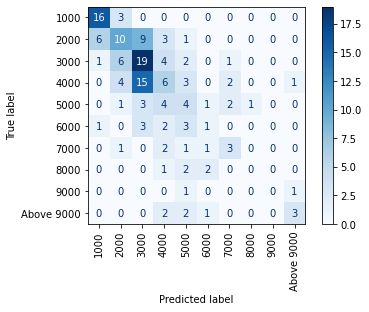

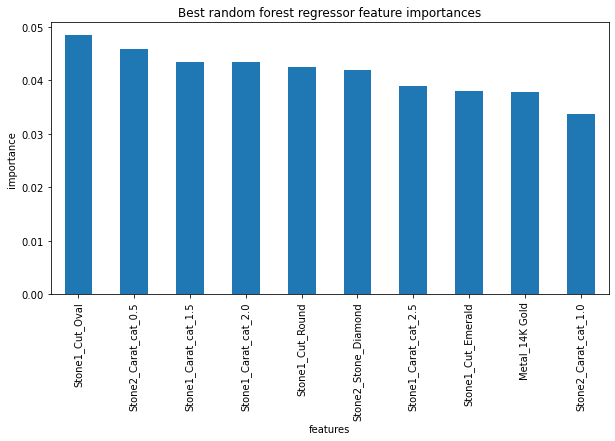

In [108]:
#Predict on the test data

rf_clf = rf_grid_cv.best_estimator_

y_pred_rf = rf_clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test,y_pred_rf, average='macro')
print('\n')
print('The Accuracy score of Random Forest prediction: ',accuracy_score(y_test, y_pred_rf))
print('Precision Score: ', precision_rf)
print('Recall Score: ', recall_rf)

print('\n')
print(classification_report(y_test, y_pred_rf))


plot_confusion_matrix(rf_grid_cv, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()


#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestclassifier` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.head(10).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');
plt.show()


## Stochastic Gradient Descent (SGD) for Gemstone Dataset

Train Accuracy Scores:  [0.352      0.31451613 0.4516129 ]
Mean Cross Validation train score:  0.37270967741935485
Standard deviation CV train score:  0.05785354744340518


Test Accuracy Scores:  [0.33333333 0.2962963  0.28301887]
Mean Cross Validation test score:  0.30421616585138594
Standard deviation CV test score:  0.021290523833710412


Precision Score:  0.2900454017527188
Recall Score: 0.27122985755925866


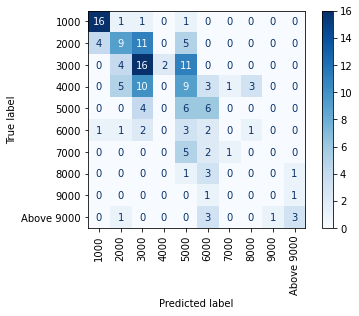



              precision    recall  f1-score   support

        1000       0.76      0.84      0.80        19
        2000       0.43      0.31      0.36        29
        3000       0.36      0.48      0.42        33
        4000       0.00      0.00      0.00        31
        5000       0.15      0.38      0.21        16
        6000       0.10      0.20      0.13        10
        7000       0.50      0.12      0.20         8
        8000       0.00      0.00      0.00         5
        9000       0.00      0.00      0.00         2
  Above 9000       0.60      0.38      0.46         8

    accuracy                           0.33       161
   macro avg       0.29      0.27      0.26       161
weighted avg       0.32      0.33      0.31       161



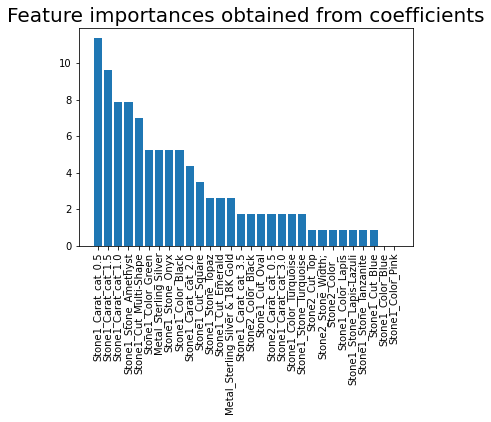

In [109]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

sgd_train_scores = cross_val_score(sgd_clf, X_train, y_train, cv=3,scoring='accuracy')

print("Train Accuracy Scores: ", sgd_train_scores)
print('Mean Cross Validation train score: ', np.mean(sgd_train_scores))
print('Standard deviation CV train score: ', np.std(sgd_train_scores))

sgd_test_scores = cross_val_score(sgd_clf, X_test, y_test, cv=3,scoring='accuracy')
print('\n')
print("Test Accuracy Scores: ", sgd_test_scores)
print('Mean Cross Validation test score: ', np.mean(sgd_test_scores))
print('Standard deviation CV test score: ', np.std(sgd_test_scores))

y_pred_sgd = sgd_clf.predict(X_test)

precision_sgd = precision_score(y_test, y_pred_sgd, average='macro')
recall_sgd = recall_score(y_test,y_pred_sgd, average='macro')
print('\n')
print('Precision Score: ', precision_sgd)
print('Recall Score:', recall_sgd)

plot_confusion_matrix(sgd_clf, X_test, y_test,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()
print('\n')
print(classification_report(y_test, y_pred_sgd))

importances_sgd = pd.DataFrame(data={'Attribute':X_train.columns, 'Importance':sgd_clf.coef_[0]})
importances_sgd = importances_sgd.sort_values(by='Importance',ascending=False)

plt.bar(x=importances_sgd['Attribute'][:30], height=importances_sgd['Importance'][:30])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## KNeighbors Classifer for  Gemstone Dataset

Train Accuracy Scores:  [0.368      0.36290323 0.35483871]
Mean Cross Validation train score:  0.36191397849462364
Standard deviation CV train score:  0.005418416030648484


Test Accuracy Scores:  [0.2962963  0.33333333 0.35849057]
Mean Cross Validation test score:  0.32937339855578845
Standard deviation CV test score:  0.025544635571870956


Precision Score:  0.4085281385281386
Recall Score: 0.27122985755925866


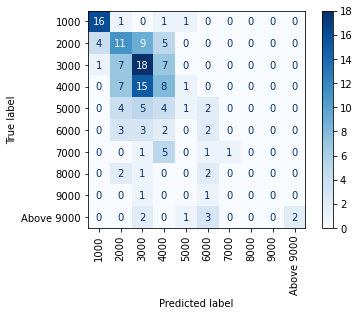



              precision    recall  f1-score   support

        1000       0.76      0.84      0.80        19
        2000       0.31      0.38      0.34        29
        3000       0.33      0.55      0.41        33
        4000       0.25      0.26      0.25        31
        5000       0.25      0.06      0.10        16
        6000       0.18      0.20      0.19        10
        7000       1.00      0.12      0.22         8
        8000       0.00      0.00      0.00         5
        9000       0.00      0.00      0.00         2
  Above 9000       1.00      0.25      0.40         8

    accuracy                           0.37       161
   macro avg       0.41      0.27      0.27       161
weighted avg       0.40      0.37      0.34       161



In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)


knn_train_scores = cross_val_score(knn_clf, X_train, y_train, cv=3,scoring='accuracy')

print("Train Accuracy Scores: ", knn_train_scores)
print('Mean Cross Validation train score: ', np.mean(knn_train_scores))
print('Standard deviation CV train score: ', np.std(knn_train_scores))

knn_test_scores = cross_val_score(knn_clf, X_test, y_test, cv=3,scoring='accuracy')
print('\n')
print("Test Accuracy Scores: ", knn_test_scores)
print('Mean Cross Validation test score: ', np.mean(knn_test_scores))
print('Standard deviation CV test score: ', np.std(knn_test_scores))

y_pred_knn = knn_clf.predict(X_test)

precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test,y_pred_sgd, average='macro')
print('\n')
print('Precision Score: ', precision_knn)
print('Recall Score:', recall_knn)

plot_confusion_matrix(knn_clf, X_test, y_test,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()
print('\n')
print(classification_report(y_test, y_pred_knn))

## Hyperparameter tuning for KNN using GridSearchCV¶

In [112]:

#Setting the grid parameters

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
grid_params = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)


#grid_params

#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 3-fold cross-validation, and all available CPU cores (if desired)
knn_grid_cv = GridSearchCV(knn_clf, param_grid=grid_params, cv=3, n_jobs=-1)

#Call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. 
knn_grid_cv.fit(X_train, y_train)

#Print the best params (`best_params_` attribute) from the grid search
print('Best Parameters:\n ', knn_grid_cv.best_params_ )

knn_best_cv_results = cross_validate(knn_grid_cv.best_estimator_, X_train, y_train, cv=3)
knn_best_scores = knn_best_cv_results['test_score']

print('\n')
print("Cross Validation Train Score: ",knn_best_scores)
print('Mean Cross Validation train score: ', np.mean(knn_best_scores))
print('Standard deviation CV train score: ', np.std(knn_best_scores))

Best Parameters:
  {'leaf_size': 2, 'n_neighbors': 7, 'p': 1}


Cross Validation Train Score:  [0.392      0.37903226 0.39516129]
Mean Cross Validation train score:  0.38873118279569896
Standard deviation CV train score:  0.006978552611717917


## Fitting the KNN Classifier with the optimal hyperparameters



The Accuracy score of KNN prediction:  0.37267080745341613
Precision Score:  0.28441938178780285
Recall Score:  0.26004418341840035


              precision    recall  f1-score   support

        1000       0.81      0.89      0.85        19
        2000       0.50      0.45      0.47        29
        3000       0.28      0.48      0.36        33
        4000       0.28      0.32      0.30        31
        5000       0.00      0.00      0.00        16
        6000       0.14      0.20      0.17        10
        7000       0.50      0.12      0.20         8
        8000       0.00      0.00      0.00         5
        9000       0.00      0.00      0.00         2
  Above 9000       0.33      0.12      0.18         8

    accuracy                           0.37       161
   macro avg       0.28      0.26      0.25       161
weighted avg       0.35      0.37      0.35       161



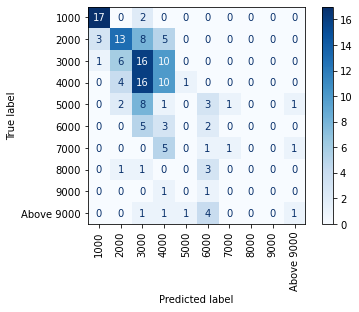

In [113]:
#Predict on the test data

#knn_clf = KNeighborsClassifier('leaf_size': 2, 'n_neighbors': 7, 'p': 1)
knn_clf = knn_grid_cv.best_estimator_

y_pred_knn = knn_clf.predict(X_test)

precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test,y_pred_knn, average='macro')
print('\n')
print('The Accuracy score of KNN prediction: ',accuracy_score(y_test, y_pred_knn))
print('Precision Score: ', precision_knn)
print('Recall Score: ', recall_knn)

print('\n')
print(classification_report(y_test, y_pred_knn))


plot_confusion_matrix(knn_grid_cv, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()


## Comparing the models

In [114]:
Labels = [ 'Logistic Regression','Random Forest','Stochastic Gradient Descent', 'KNN']

precision_test = [precision_lr, precision_rf,precision_sgd,precision_knn]
recall_test =[recall_lr, recall_rf,recall_sgd,recall_knn]


matrix = pd.DataFrame(list(zip(Labels, precision_test, recall_test)), 
               columns =['Algorithm', 'Precision Score', 'Recall score' ]) 
print(matrix)


                     Algorithm  Precision Score  Recall score
0          Logistic Regression         0.381961      0.317071
1                Random Forest         0.305661      0.305624
2  Stochastic Gradient Descent         0.290045      0.271230
3                          KNN         0.284419      0.260044


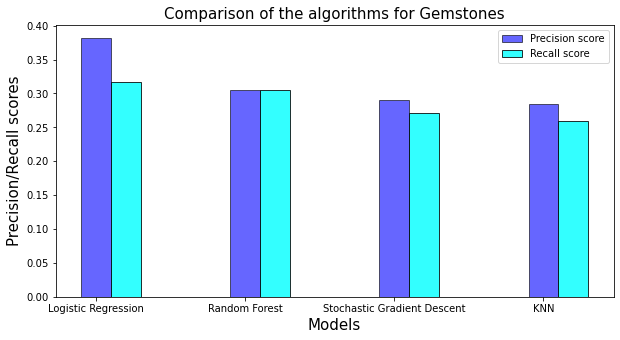

In [115]:
#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4]
index_acc=[1.2,2.2,3.2,4.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Precision/Recall scores',fontsize=15)
plt.title('Comparison of the algorithms for Gemstones',fontsize=15)
_=plt.bar(index, precision_test,color='b',alpha=0.6,label='Precision score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,recall_test,color='cyan',alpha=0.8,label='Recall score',edgecolor='k',width=0.2)

#_=plt.bar(index,precision_test)
plt.xticks([1, 2,3,4], Labels)
plt.legend()
plt.savefig("27.png")
plt.show()